In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10,10]
import seaborn as sns
sns.set_theme(style="darkgrid")
from wordcloud import WordCloud

import nltk
from nltk import sent_tokenize
''' Required for Google Colab'''
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
''' Required for Google Colab'''
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize

import contractions
import re
import itertools
import datetime
import time
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


I started with uploading the dataset on Google Colab.



In [ ]:
# Upload files

In [ ]:
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv


Next, I read the DataFrame and checked the null values in it.

There are 7 null values in the text articles, 122 in title and 503 in author out of a total of 20800 rows, I decided to drop the rows. For the test data, I filled them up with a blank.

In [ ]:
train_df = pd.read_csv('train.csv', header=0)
test_df = pd.read_csv('test.csv', header=0)

In [ ]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_df.shape

(20800, 5)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


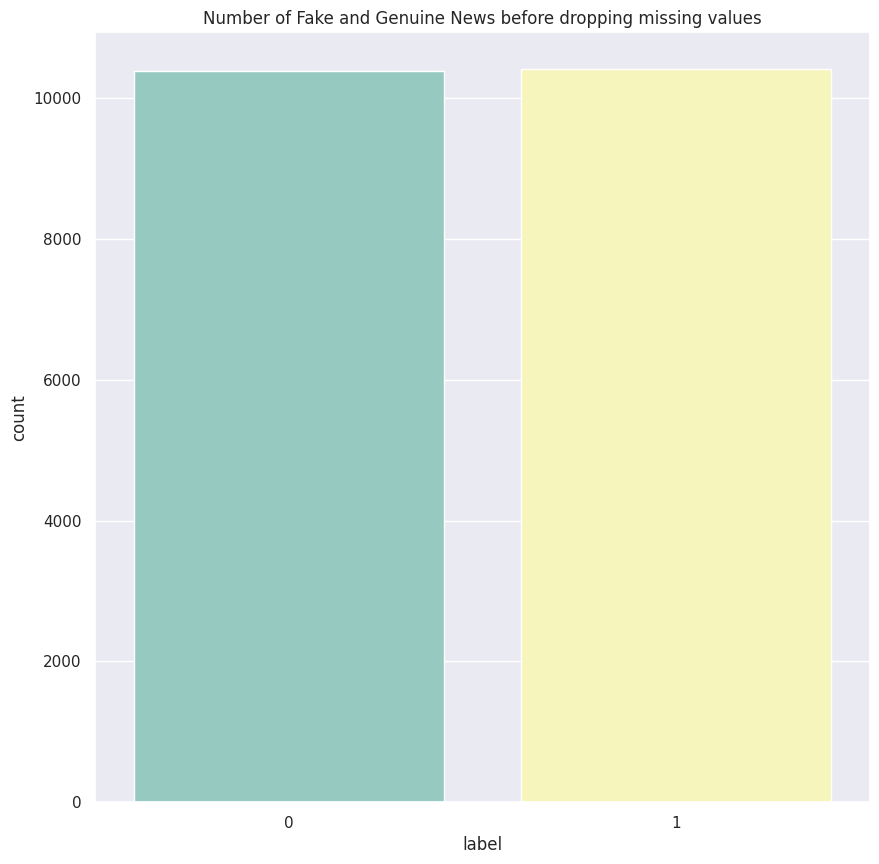

In [ ]:
sns.countplot(x='label', data=train_df, palette='Set3')
plt.title("Number of Fake and Genuine News before dropping missing values")
plt.show()

The labels look almost equally distributed.

In [ ]:
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test_df.shape

(5200, 4)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
train_df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
test_df.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

**Drop all instances which have atleast one column missing**

In [ ]:
train_df.dropna(axis=0, how='any',inplace=True)

In [ ]:
test_df=test_df.fillna(' ')

In [ ]:
train_df.shape, test_df.shape

((18285, 5), (5200, 4))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5200 non-null   object
 2   author  5200 non-null   object
 3   text    5200 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


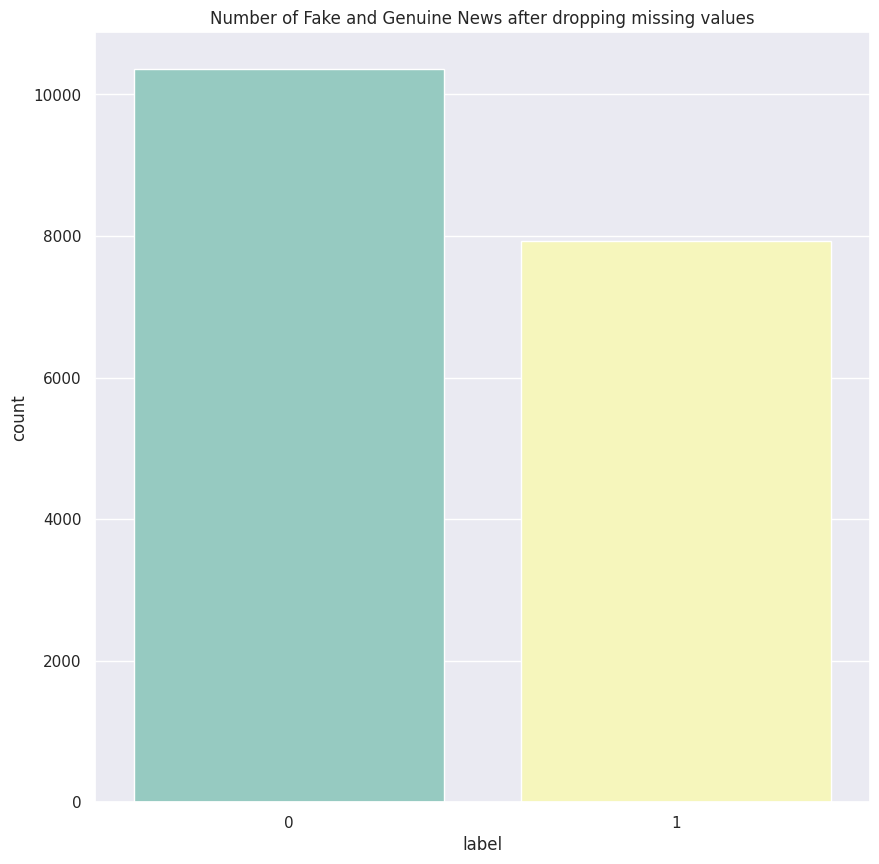

In [ ]:
sns.countplot(x='label', data=train_df, palette='Set3')
plt.title("Number of Fake and Genuine News after dropping missing values")
plt.show()

In [ ]:
train_df = pd.read_csv('train.csv', header=0)
test_df = pd.read_csv('test.csv', header=0)
print(train_df.isna().sum())
print(test_df.isna().sum())
train_df.dropna(axis=0, how='any',inplace=True)
test_df = test_df.fillna(' ')

id           0
title      558
author    1957
text        39
label        0
dtype: int64
id          0
title     122
author    503
text        7
dtype: int64


Additionally, I also check the distribution of ‘Fake’ and ‘Genuine’ news in the dataset. Usually, I set the rcParams for all plots on the notebook while importing matplotlib.

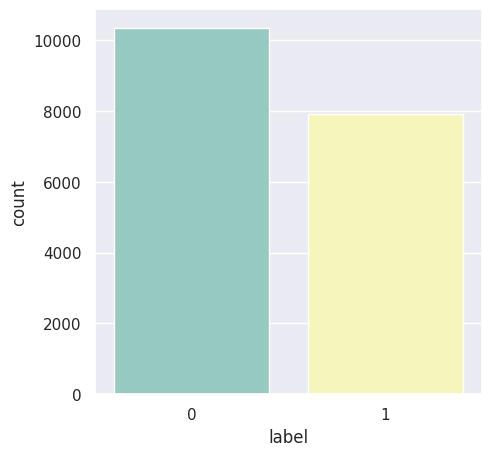

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [5, 5]
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.countplot(x='label', data=train_df, palette='Set3')
plt.show()

The ratio is disturbed from being 1:1 to 4:5 for genuine to fake news.

**Check length of Text**

In [ ]:
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))

In [ ]:
train_df.head()

,id,title,author,text,label,raw_text_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


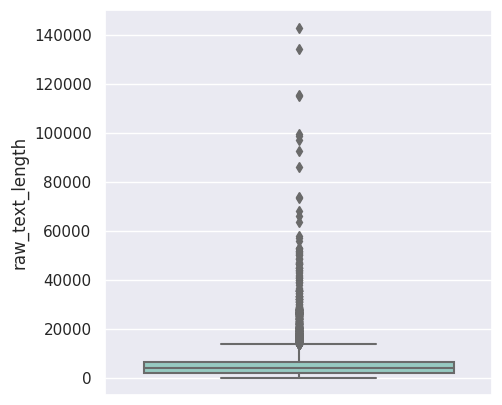

In [ ]:
sns.boxplot(y='raw_text_length', data=train_df, palette="Set3")
plt.show()

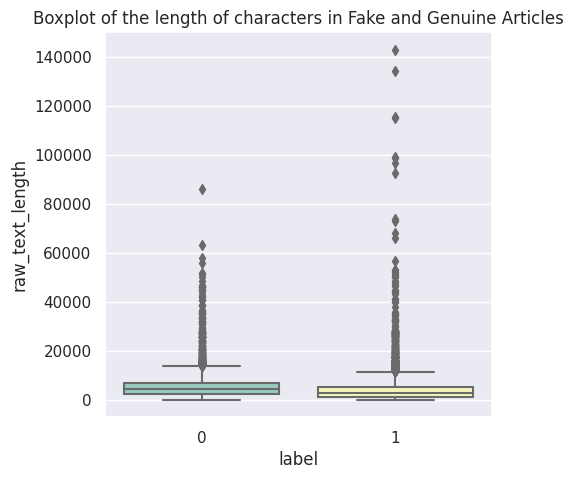

In [ ]:
sns.boxplot(y='raw_text_length', x='label', data=train_df, palette="Set3")
plt.title("Boxplot of the length of characters in Fake and Genuine Articles")
plt.show()

In [ ]:
train_df['raw_text_length'].describe()

count     18285.000000
mean       4800.181843
std        5225.865069
min           1.000000
25%        1834.000000
50%        3694.000000
75%        6535.000000
max      142961.000000
Name: raw_text_length, dtype: float64

In [ ]:
train_df[train_df['raw_text_length']==1]

,id,title,author,text,label,raw_text_length
82,82,Huma’s Weiner Dogs Hillary,Steve Sailer,,1,1
169,169,Mohamad Khweis: Another “Virginia Man” (Palest...,James Fulford,,1,1
295,295,A Connecticut Reader Reports Record Voter Regi...,VDARE.com Reader,,1,1
470,470,BULLETIN: There ARE Righteous Jews For Trump!;...,admin,,1,1
592,592,Is your promising internet career over now Vin...,newsbiscuit editorial team,,1,1
...,...,...,...,...,...,...
19857,19857,"A Fifth Clinton Presidency? Hill, No!",Michelle Malkin,,1,1
19929,19929,98% of public now ‘really looking forward’ to ...,NewsBiscuit,,1,1
20242,20242,Radio Derb Transcript For October 21 Up: The M...,John Derbyshire,,1,1
20264,20264,Pro-sovereignty Legislators Demand That Admini...,Brenda Walker,,1,1


In [ ]:
train_df['text'] = train_df['text'].str.strip()

In [ ]:
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))

In [ ]:
train_df['raw_text_length'].describe()

count     18285.000000
mean       4799.886847
std        5225.922143
min           0.000000
25%        1834.000000
50%        3693.000000
75%        6535.000000
max      142961.000000
Name: raw_text_length, dtype: float64

In [ ]:
len(train_df[train_df['raw_text_length']==0])

74

It is seen that the median length is lower for fake articles but it also has loads of outliers. Both have zero length.

It is seen that they start from 0 which is concerning. It actually starts from 1 when I used .describe() to see the numbers. So I took a look at these texts and found that they are blank. The obvious answer to this is strip and drop length zero. I checked the total number of zero-length texts is 74.

#Start Over

since ~ 600 rows I am discarding. I would rather replace the authors as blank and keep the article texts

In [ ]:
train_df = pd.read_csv('train.csv', header=0)
train_df = train_df.fillna(' ')
train_df['text'] = train_df['text'].str.strip()
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))
print(len(train_df[train_df['raw_text_length']==0]))

116


In [ ]:
train_df.isna().sum()

id                 0
title              0
author             0
text               0
label              0
raw_text_length    0
dtype: int64

In [ ]:
train_df = train_df[train_df['raw_text_length'] > 0]
train_df.shape

(20684, 6)

In [ ]:
train_df.isna().sum()

id                 0
title              0
author             0
text               0
label              0
raw_text_length    0
dtype: int64

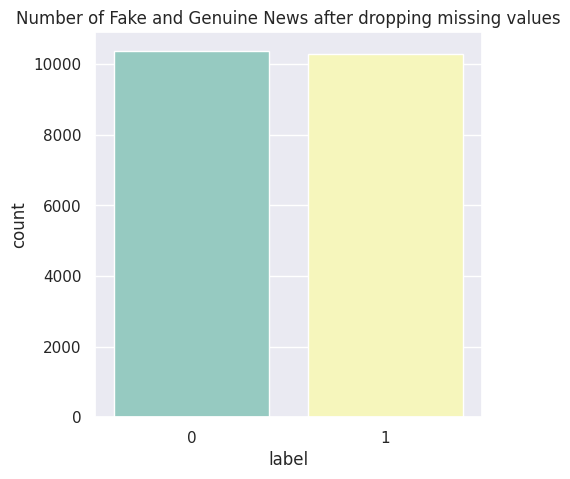

In [ ]:
sns.countplot(x='label', data=train_df, palette='Set3')
plt.title("Number of Fake and Genuine News after dropping missing values")
plt.show()

**I decided to start over again**. So, I would fill all nans with a blank and strip them next, then, remove the zero-length texts and that should be good to start the preprocessing.

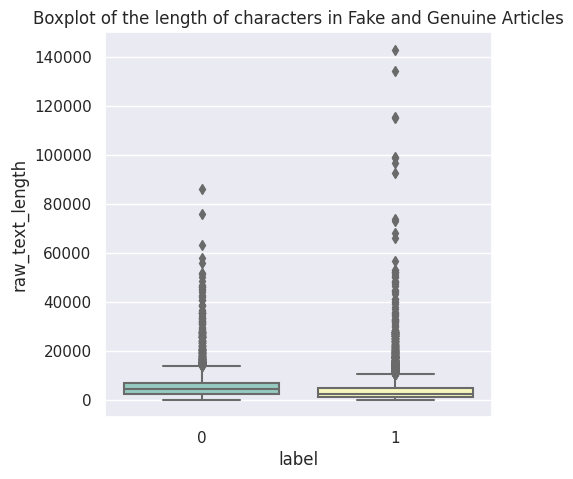

In [ ]:
sns.boxplot(y='raw_text_length', x='label', data=train_df, palette="Set3")
plt.title("Boxplot of the length of characters in Fake and Genuine Articles")
plt.show()

In [ ]:
train_df['raw_text_length'].describe()

count     20684.000000
mean       4569.360472
std        5132.617915
min           1.000000
25%        1641.750000
50%        3384.500000
75%        6288.250000
max      142961.000000
Name: raw_text_length, dtype: float64

In [ ]:
train_df[train_df['raw_text_length']==10]

,id,title,author,text,label,raw_text_length
5048,5048,,Anonymous,Brilliant!,1,10
8920,8920,,Anonymous,Brilliant!,1,10
10784,10784,,Jonathan white,are u dumb,1,10
12993,12993,2009 FLASHBACK: “What If” Remixed,Alex Ansary,11/08/2016,1,10
15582,15582,,Anonymous,Brilliant!,1,10
16929,16929,,Anonymous,Brilliant!,1,10
18006,18006,,william ketley,she is fit,1,10


These look like comments in the dataset. It will be difficult to separate. So I will keep them as it is and work on the next steps.

It so appeared after that there are more texts that have single-digit lengths or as low as 10. They seemed more like comments than proper texts. I will keep them for the time being as it is and move on to the next step.

#Text Preprocessing

In [ ]:
len(train_df['author'].unique())

4196

In [ ]:
gen_news_authors = set(list(train_df[train_df['label']==0]['author'].unique()))
fake_news_authors = set(list(train_df[train_df['label']==1]['author'].unique()))

In [ ]:
overlapped_authors = gen_news_authors.intersection(fake_news_authors)

In [ ]:
len(gen_news_authors), len(fake_news_authors), len(overlapped_authors)

(2226, 1976, 6)

In [ ]:
train_df.head()

,id,title,author,text,label,raw_text_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


So before I began with text preprocessing, I actually looked at the overlapping number of authors that have fake and genuine articles. In other words, would having the author’s information be helpful in any way? I found out that there are 3838 authors, out of which 2226 are genuine and 1976 are fake news’ authors. 5 authors among them are both genuine and fake news’ authors.

In [ ]:
original_train_df = train_df.copy() 

#Text Cleaning


1. Remove special characters
2. Expand contractions
3. Convert to lower-case
4. Word Tokenize
5. Remove Stopwords











In [ ]:
def preprocess_text(x):
  cleaned_text = re.sub(r'[^a-zA-Z\d\s\']+', '', x)
  word_list = []
  for each_word in cleaned_text.split(' '):
    try:
      word_list.append(contractions.fix(each_word).lower())
    except:
      print(x)
  return " ".join(word_list)
  
text_cols = ['text', 'title', 'author']
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(lambda x: preprocess_text(x))
  test_df[col] = test_df[col].apply(lambda x: preprocess_text(x)) 

Processing column: text
Processing column: title
Processing column: author


#Got Error because of some sort of Turkish/Slavic language

ABÇin ilişkilerinde ABD ve NATOnun etkisi yazan Manlio Dinucci Uluslararası bir forumda konuşan İtalyan coğrafyacı Manlio Dinucci ABDnin tüm dünyaya egemen olabilmek için sahip olduğu silahların analizini bireşimleştirdi Suriye Rusya ve Çinin bugün elde silah herkesin açıkça kabul ettiği bu üstünlüğü dünyanın bu tek kutuplu örgütlenişi tartışılır hale getirmesinden dolayı bu makale daha da önem kazanmaktadır

Therefore I rearranged the order of preprocessing

In [ ]:
text_cols = ['text', 'title', 'author']

In [ ]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(lambda x: preprocess_text(x))
  test_df[col] = test_df[col].apply(lambda x: preprocess_text(x)) 

Processing column: text
Processing column: title
Processing column: author
CPU times: user 45.9 s, sys: 0 ns, total: 45.9 s
Wall time: 46.1 s


In [ ]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(word_tokenize)
  test_df[col] = test_df[col].apply(word_tokenize)

Processing column: text
Processing column: title
Processing column: author
CPU times: user 53.9 s, sys: 241 ms, total: 54.2 s
Wall time: 54.3 s


In [ ]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(lambda x: [each_word for each_word in x if each_word not in stopwords])
  test_df[col] = test_df[col].apply(lambda x: [each_word for each_word in x if each_word not in stopwords])

Processing column: text
Processing column: title
Processing column: author
CPU times: user 20.8 s, sys: 24 ms, total: 20.8 s
Wall time: 20.8 s


#Wordcloud

In [ ]:
# since count vectorizer expects strings

train_df['text_joined'] = train_df['text'].apply(lambda x: " ".join(x))
test_df['text_joined'] = test_df['text'].apply(lambda x: " ".join(x))

In [ ]:
train_df.head() 

,id,title,author,text,label,raw_text_length,text_joined
0,0,"[house, dem, aide, even, see, comeys, letter, ...","[darrell, lucus]","[house, dem, aide, even, see, comeys, letter, ...",1,4930,house dem aide even see comeys letter jason ch...
1,1,"[flynn, hillary, clinton, big, woman, campus, ...","[daniel, j, flynn]","[ever, get, feeling, life, circles, roundabout...",0,4160,ever get feeling life circles roundabout rathe...
2,2,"[truth, might, get, fired]",[consortiumnewscom],"[truth, might, get, fired, october, 29, 2016, ...",1,7692,truth might get fired october 29 2016 tension ...
3,3,"[15, civilians, killed, single, us, airstrike,...","[jessica, purkiss]","[videos, 15, civilians, killed, single, us, ai...",1,3237,videos 15 civilians killed single us airstrike...
4,4,"[iranian, woman, jailed, fictional, unpublishe...","[howard, portnoy]","[print, iranian, woman, sentenced, six, years,...",1,938,print iranian woman sentenced six years prison...


In [ ]:
 #iterate through the csv file
all_texts_gen = " ".join(train_df[train_df['label']==0]['text_joined'])
all_texts_fake = " ".join(train_df[train_df['label']==1]['text_joined'])

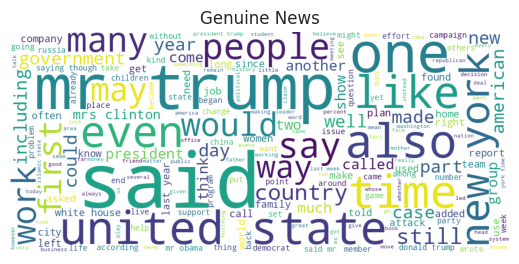

In [ ]:
wordcloud = WordCloud(width = 900, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_texts_gen)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genuine News")
plt.show()

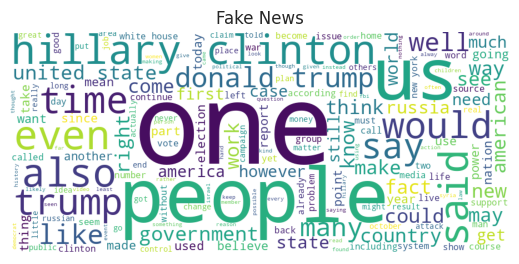

In [ ]:
wordcloud = WordCloud(width = 900, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_texts_fake)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Fake News")
plt.show()

In the fake news wordcloud, the frequency of some words is strikingly higher than the others. On the genuine news’ wordcloud, there is a mix of different font sizes. On the contrary, in the fake news dataset, the smaller texts are in the background and some of the words are used much more frequently. There are fewer medium-sized words in the fake news wordcloud or, in other words, there is a disconnect in progressively diminishing frequency of appearance. The frequency is either high or low.

#Stylometric Analysis

The stylometric analysis is often referred to as the analysis of the author’s style. I will look into a few of the stylometric features such as the number of sentences per article, the average words per sentence in an article, the average length of words per article, and the POS tag counts.

In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [ ]:
%%time
original_train_df['sent_tokens'] = original_train_df['text'].apply(sent_tokenize)

CPU times: user 19.2 s, sys: 142 ms, total: 19.4 s
Wall time: 19.4 s


In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length,sent_tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,[House Dem Aide: We Didn’t Even See Comey’s Le...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,[Ever get the feeling your life circles the ro...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,"[Why the Truth Might Get You Fired October 29,..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,[Videos 15 Civilians Killed In Single US Airst...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,[Print \nAn Iranian woman has been sentenced t...


**Number of Sentences per Article**

To get this I needed the original dataset since I have lost the sentence information in train_df. So, I saved a copy of the actual data in orginal_train_df which I used to convert the sentences to sequences.

In [ ]:
%%time
original_train_df['len_sentence'] = original_train_df['sent_tokens'].apply(len)

CPU times: user 7.77 ms, sys: 0 ns, total: 7.77 ms
Wall time: 7.78 ms


In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length,sent_tokens,len_sentence
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,[House Dem Aide: We Didn’t Even See Comey’s Le...,37
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,[Ever get the feeling your life circles the ro...,29
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,"[Why the Truth Might Get You Fired October 29,...",51
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,[Videos 15 Civilians Killed In Single US Airst...,27
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,[Print \nAn Iranian woman has been sentenced t...,5


Now, I am looking at the count of the sentences by each target category as follows:

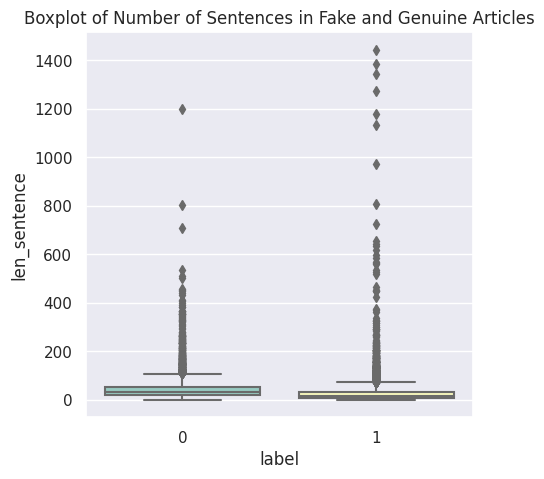

In [ ]:
sns.boxplot(y='len_sentence', x='label', data=original_train_df, palette="Set3")
plt.title("Boxplot of Number of Sentences in Fake and Genuine Articles")
plt.show()

Evidently, fake articles have a lot of outliers but 75% of the fake articles have the number of sentences lower than the 50% of the genuine news articles.

**Average No. of Words per Sentence Article**



In [ ]:
%%time
original_train_df['sent_word_tokens'] = original_train_df['sent_tokens'].apply(lambda x: [word_tokenize(each_sentence) for each_sentence in x])

CPU times: user 1min 41s, sys: 798 ms, total: 1min 42s
Wall time: 1min 42s


In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length,sent_tokens,len_sentence,sent_word_tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,[House Dem Aide: We Didn’t Even See Comey’s Le...,37,"[[House, Dem, Aide, :, We, Didn, ’, t, Even, S..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,[Ever get the feeling your life circles the ro...,29,"[[Ever, get, the, feeling, your, life, circles..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,"[Why the Truth Might Get You Fired October 29,...",51,"[[Why, the, Truth, Might, Get, You, Fired, Oct..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,[Videos 15 Civilians Killed In Single US Airst...,27,"[[Videos, 15, Civilians, Killed, In, Single, U..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,[Print \nAn Iranian woman has been sentenced t...,5,"[[Print, An, Iranian, woman, has, been, senten..."


In [ ]:
%%time
def get_seq_tokens_cleaned(seq_tokens):
  no_punc_seq = [each_seq.translate(str.maketrans('', '', string.punctuation)) for each_seq in seq_tokens]
  sent_word_tokens = [word_tokenize(each_sentence) for each_sentence in no_punc_seq]
  return sent_word_tokens

original_train_df['sent_word_tokens'] = original_train_df['sent_tokens'].apply(lambda x: get_seq_tokens_cleaned(x))

CPU times: user 1min 30s, sys: 951 ms, total: 1min 31s
Wall time: 1min 31s


In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length,sent_tokens,len_sentence,sent_word_tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,[House Dem Aide: We Didn’t Even See Comey’s Le...,37,"[[House, Dem, Aide, We, Didn, ’, t, Even, See,..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,[Ever get the feeling your life circles the ro...,29,"[[Ever, get, the, feeling, your, life, circles..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,"[Why the Truth Might Get You Fired October 29,...",51,"[[Why, the, Truth, Might, Get, You, Fired, Oct..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,[Videos 15 Civilians Killed In Single US Airst...,27,"[[Videos, 15, Civilians, Killed, In, Single, U..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,[Print \nAn Iranian woman has been sentenced t...,5,"[[Print, An, Iranian, woman, has, been, senten..."


In [ ]:
def get_average_words_in_sent(seq_word_tokens):
  return np.mean([len(seq) for seq in seq_word_tokens])

In [ ]:
%%time
original_train_df['avg_words_per_sent'] = original_train_df['sent_word_tokens'].apply(lambda x: get_average_words_in_sent(x))

CPU times: user 314 ms, sys: 1.04 ms, total: 315 ms
Wall time: 315 ms


In [ ]:
original_train_df['avg_words_per_sent'].describe()

count    20684.000000
mean        23.994105
std         10.495053
min          1.000000
25%         19.266667
50%         23.076923
75%         27.147059
max        327.000000
Name: avg_words_per_sent, dtype: float64

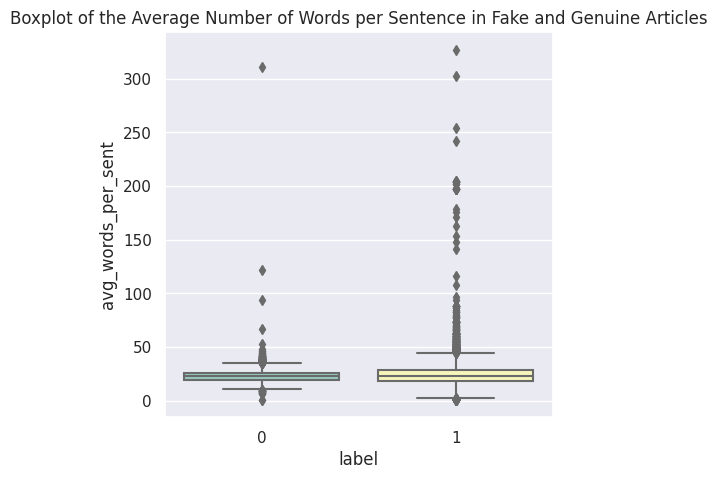

In [ ]:
sns.boxplot(y='avg_words_per_sent', x='label', data=original_train_df, palette="Set3")
plt.title("Boxplot of the Average Number of Words per Sentence in Fake and Genuine Articles")
plt.show()

Here, I counted the total number of words per sentence in each article and returned the average. Then I plotted the counts in a boxplot to visualize them. **It is seen that, on average, fake articles are wordier than genuine ones.**

**Average Word Length per Article**

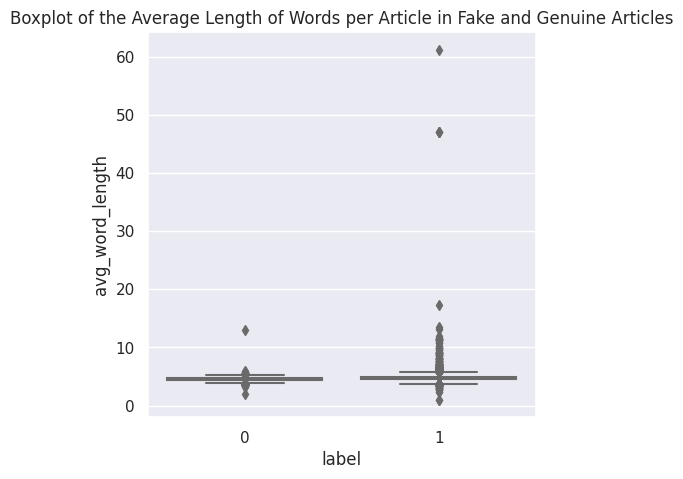

In [ ]:
def get_average_word_length(seq_word_tokens):
  return np.mean([len(word) for seq in seq_word_tokens for word in seq])

original_train_df['avg_word_length'] = original_train_df['sent_word_tokens'].apply(lambda x: get_average_word_length(x))

sns.boxplot(y='avg_word_length', x='label', data=original_train_df, palette="Set3")
plt.title("Boxplot of the Average Length of Words per Article in Fake and Genuine Articles")
plt.show()

**This is the average word length in one article. In the box plot, it is evident that the average word length is higher in the fake articles.**

**POS Tag Counts**

In [ ]:
all_tokenized_gen = [a for b in train_df[train_df['label']==0]['text'].tolist() for a in b]
all_tokenized_fake = [a for b in train_df[train_df['label']==1]['text'].tolist() for a in b]

In [ ]:
len(all_tokenized_gen), len(all_tokenized_fake)

(5100290, 3701992)

In [ ]:
def get_post_tags_list(tokenized_articles):
  all_pos_tags = []
  for word in tokenized_articles:
    pos_tag = nltk.pos_tag([word])[0][1]
    all_pos_tags.append(pos_tag)
  return all_pos_tags

In [ ]:
%%time
all_pos_tagged_word_gen = get_post_tags_list(all_tokenized_gen)
all_pos_tagged_word_fake = get_post_tags_list(all_tokenized_fake)

CPU times: user 14min 9s, sys: 49 s, total: 14min 58s
Wall time: 15min


In [ ]:
all_pos_tagged_word_gen[:5], all_pos_tagged_word_fake[:5]

(['RB', 'VB', 'VBG', 'NN', 'NNS'], ['NN', 'NN', 'NN', 'RB', 'VB'])

In [ ]:
gen_pos_df = pd.DataFrame(dict(Counter(all_pos_tagged_word_gen)).items(), columns=['Pos_tag', 'Genuine News'])
fake_pos_df = pd.DataFrame(dict(Counter(all_pos_tagged_word_fake)).items(), columns=['Pos_tag', 'Fake News'])

In [ ]:
gen_pos_df

,Pos_tag,Genuine News
0,RB,232766
1,VB,86032
2,VBG,210332
3,NN,2571444
4,NNS,761811
5,IN,70711
6,VBN,270905
7,JJ,446416
8,CD,170398
9,MD,51142


In [ ]:
fake_pos_df

,Pos_tag,Fake News
0,NN,1908485
1,RB,181326
2,VB,71345
3,NNS,537849
4,VBN,173962
5,CD,118797
6,JJ,340941
7,JJS,9734
8,VBG,149355
9,IN,47967


In [ ]:
pos_df = gen_pos_df.merge(fake_pos_df, on='Pos_tag')

In [ ]:
# Make percentage for comparison
pos_df['Genuine News'] = pos_df['Genuine News'] * 100 / pos_df['Genuine News'].sum()
pos_df['Fake News'] = pos_df['Fake News'] * 100 / pos_df['Fake News'].sum()
pos_df.head()

,Pos_tag,Genuine News,Fake News
0,RB,4.563780,4.909854
1,VB,1.686806,1.931844
2,VBG,4.123922,4.044159
3,NN,50.417604,51.676990
4,NNS,14.936621,14.563603


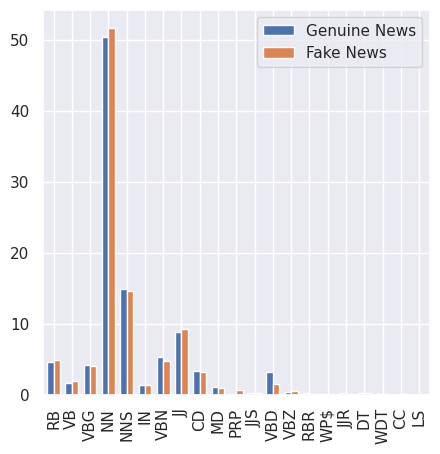

In [ ]:
# plot a multiple bar chart
pos_df.plot.bar(width=0.7)
plt.xticks(range(0,len(pos_df['Pos_tag'])), pos_df['Pos_tag'])
plt.show()

I tried to look at the part-of-speech (POS) combinations in Fake vs Genuine articles. I only stored the POS of the words into a list while iterating through each article, put the respective POS count in one DataFrame, and used a bar plot to show the percentage combination of the POS tags in Fake and News articles. The Nouns are much higher in both the articles. In general, there is no distinct pattern except for the percentage of past-tense verbs in fake news is half of that in the genuine ones. Apart from that, all other POS types are almost equal in fake and genuine articles.

#Model Training

##Text Classification using Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df['text_joined'] = train_df['text'].apply(lambda x: " ".join(x))
test_df['text_joined'] = test_df['text'].apply(lambda x: " ".join(x))

target = train_df['label'].values

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
tf_idf_transformer = TfidfTransformer(smooth_idf=False)

# fit train data to count vectorizer
count_vectorizer.fit(train_df['text_joined'].values)
count_vect_train = count_vectorizer.transform(train_df['text_joined'].values)

# fit ngrams count to tfidf transformers
tf_idf_transformer.fit(count_vect_train)
tf_idf_train = tf_idf_transformer.transform(count_vect_train)

In [ ]:
# Transform the test data as well
count_vect_test = count_vectorizer.transform(test_df['text_joined'].values)
tf_idf_test = tf_idf_transformer.transform(count_vect_test)

##Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_train, target, random_state=0)

Once the analysis is complete, I took first the conventional way of using the Count Vectorizer and term frequency-inverse document frequency or Tf-idf. The Count Vectorizer, as configured in the code, generates bigrams as well. The counts of their occurrences are obtained in the form of a matrix using the CountVectorizer() and this word-count matrix is then transformed into the normalized term-frequency (tf-idf) representation. Here, I have used smooth=False, to avoid zero division error. By providing smooth=False, I am basically adding one to the document frequency since it is the denominator in the formula for idf calculation, as shown below —

**idf(t) = log [ n / (df(t) + 1) ]**

In [ ]:
df_perf_metrics = pd.DataFrame(columns=['Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision', 'Recall', 'f1_score'])

#Machine Learning Classifier Training and Validating
**Benchmarking with Default Configurations**

In [ ]:
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score', 'Training Time (secs'
])
models_trained_list = []


def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    # time keeping
    start_time = time.time()
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    elapsed_time = time.time() - start_time
    # Time Elapsed
    print("Time elapsed: {:.2f} s.".format(elapsed_time))
    # Predictions
    y_pred = model.predict(X_test)
    # Add to ith row of dataframe - metrics
    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred), "{:.2f}".format(elapsed_time)
    ]
    # keep a track of trained models
    models_trained_list.append(model)
    print("Completed {} model's performance assessment.".format(model_name))

 I intended to train the models with the default configurations and pick out the best-performing model to tune later. For this, I looped through a list and saved all the performance metrics into another DataFrame and the models in a list.
 

In [ ]:
models_list = [LogisticRegression(),
               MultinomialNB(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               GradientBoostingClassifier(),
               AdaBoostClassifier()]

In [ ]:
%%time
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 53.25 s.
Completed LogisticRegression model's performance assessment.
Training MultinomialNB model...
Completed MultinomialNB model training.
Time elapsed: 0.47 s.
Completed MultinomialNB model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 726.83 s.
Completed RandomForestClassifier model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Time elapsed: 246.04 s.
Completed DecisionTreeClassifier model's performance assessment.
Training GradientBoostingClassifier model...
Completed GradientBoostingClassifier model training.
Time elapsed: 5139.10 s.
Completed GradientBoostingClassifier model's performance assessment.
Training AdaBoostClassifier model...
Completed AdaBoostClassifier model training.
Time elapsed: 2186.11 s.
Completed AdaBoostClassifie

In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score,Training Time (secs
0,LogisticRegression,0.982660,0.946432,0.927520,0.966562,0.946638,53.25
1,MultinomialNB,0.949333,0.844131,0.997136,0.684894,0.812034,0.47
2,RandomForestClassifier,0.999936,0.908528,0.933389,0.876475,0.904037,726.83
3,DecisionTreeClassifier,0.999936,0.902340,0.898007,0.904013,0.901000,246.04
4,GradientBoostingClassifier,0.945401,0.939083,0.924190,0.954367,0.939036,5139.10
5,AdaBoostClassifier,0.939019,0.941597,0.934109,0.948072,0.941039,2186.11


###Adding Title and Author Information to the Text

To check if there is any improvement

In [ ]:
train_df['all_info'] = train_df['text'] + train_df['title'] + train_df['author']
train_df['all_info'] = train_df['all_info'].apply(lambda x: " ".join(x))

test_df['all_info'] = test_df['text'] + test_df['title'] + test_df['author']
test_df['all_info'] = test_df['all_info'].apply(lambda x: " ".join(x))

In [ ]:
tf_idf_transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
count_vect_train = count_vectorizer.fit_transform(train_df['all_info'].values)
tf_idf_train = tf_idf_transformer.fit_transform(count_vect_train)

X_train, X_test, y_train, y_test = train_test_split(tf_idf_train,
                                                    target,
                                                    random_state=0)

In [ ]:
# Transform the test data
count_vect_test = count_vectorizer.transform(test_df['all_info'].values)
tf_idf_test = tf_idf_transformer.transform(count_vect_test)

In [ ]:
%%time
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 66.69 s.
Completed LogisticRegression model's performance assessment.
Training MultinomialNB model...
Completed MultinomialNB model training.
Time elapsed: 0.44 s.
Completed MultinomialNB model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 561.43 s.
Completed RandomForestClassifier model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Time elapsed: 172.96 s.
Completed DecisionTreeClassifier model's performance assessment.
Training GradientBoostingClassifier model...
Completed GradientBoostingClassifier model training.
Time elapsed: 5344.39 s.
Completed GradientBoostingClassifier model's performance assessment.
Training AdaBoostClassifier model...
Completed AdaBoostClassifier model training.
Time elapsed: 2252.94 s.
Completed AdaBoostClassifie

In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score,Training Time (secs
0,LogisticRegression,0.988075,0.961710,0.949731,0.973643,0.961538,66.69
1,MultinomialNB,0.950106,0.851286,0.998314,0.698662,0.822032,0.44
2,RandomForestClassifier,1.000000,0.932121,0.957411,0.902046,0.928904,561.43
3,DecisionTreeClassifier,1.000000,0.979888,0.977291,0.981904,0.979592,172.96
4,GradientBoostingClassifier,0.980017,0.976213,0.972276,0.979544,0.975897,5344.39
5,AdaBoostClassifier,0.975891,0.973699,0.971765,0.974823,0.973291,2252.94


I used Logistic Regression, Multinomial Naive Bayes, Decision Trees, Random Forest, Gradient Boost, and Ada Boost classifiers. The precision of MultinomialNB is the best among all, but f1-score falters because of the poor recall score. In fact, recall is the worst at 68%. The best models in the results were Logistic Regression and AdaBoost whose results are similar. I chose to go with Logistic Regression to save training time.

##Tuning the Logistic Regression Model

**GridSearchCV for Tuning Logistic Regression Classifier**

In [ ]:
model = LogisticRegression()

In [ ]:
max_iter = [100, 200, 500, 1000]
C = [0.1, 0.5, 1, 10, 50, 100]

param_grid = dict(max_iter=max_iter, C=C)

In [ ]:
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=5,
                    scoring=['f1'],
                    refit='f1',
                    verbose=2)

In [ ]:
%%time
grid_result = grid.fit(X_train, y_train)

In [ ]:
grid_result.best_estimator_

In [ ]:
grid_result.best_params_

In [ ]:
model = grid_result.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

Tune my chosen classifier. I started out with a wider range for max_iter and C. Then used GirdSearchCV with cv=r, i.e. 5 folds for cross-validation since label distribution is fairly distributed. I have used f1-score for scoring and used refit to return the trained model with the best f1-score.

##Retuning the Logistic Regression Classifier

####Attempt 1

In the last grid, the lowest of the max_iter list (100) and highest of the C list (100) were the best values. In this attempt, I will see if there are better fits in the values beyond these, lower than 100 for max_iter or just a bit higher, and higher than 100 for C or just a bit lower.

In [ ]:
%%time
model = LogisticRegression()

max_iter = [50, 75, 100]
C = [75, 100, 125]

param_grid = dict(max_iter=max_iter, C=C)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=5,
                    scoring=['f1'],
                    refit='f1',
                    verbose=2)

grid_result = grid.fit(X_train, y_train)

In [ ]:
model = grid_result.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

In [ ]:
grid_result.best_params_

####Attempt 2

In the previous attempt, we saw max_iter is still at 100 while C = 125 resulted into a marginally higher precision and consequently the f1 score improved just a bit. Let's see if we can improve the results a little more.

For this I have kept C constant and I have stated a range of C from 120 to 150 which increases by a step value of 10.

In [ ]:
%%time
model = LogisticRegression()

max_iter = [100]
C = [120, 130, 140, 150]

param_grid = dict(max_iter=max_iter, C=C)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=5,
                    scoring=['f1'],
                    refit='f1',
                    verbose=2)

grid_result = grid.fit(X_train, y_train)

In [ ]:
model = grid_result.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

In [ ]:
grid_result.best_params_

###**Attempt 3**
One final attempt to find the best model, keeping C = 100 and max_iter = 100, 125, 140.

In [ ]:
%%time
model = LogisticRegression()

max_iter = [100]
C = [100, 125, 140]

param_grid = dict(max_iter=max_iter, C=C)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=5,
                    scoring=['f1'],
                    refit='f1',
                    verbose=2)

grid_result = grid.fit(X_train, y_train)

In [ ]:
model = grid_result.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

In [ ]:
grid_result.best_params_

The best resulting model had an accuracy of 97.62% and an f1-score of 97.60%. For both, we have achieved 4% improvement. Now, I noticed that the max_iter’s best value was 100, which was the lower boundary of the range, and for C, it was also 100, but it was the upper boundary of the range. So, to accommodate parameter search, I used max_iter = 50, 70 , 100 and C = 75, 100, 125. There was a marginal improvement with max_iter=100 and C=125. So, I decided to keep that constant and scaled up the parameter search for C from 120 to 150, with step size 10. All performance metrics were equal for this run to the starting grid’s results. However, the value of C=140 for this run.